In [2]:
import torch
import tqdm
import logger
import numpy as np
import torch.nn as nn
import pickle
import metrics
from skimage import io
from skimage import transform
# from model import FusionNet, DilationCNN, UNet
# from dataset import NucleiDataset, HPADataset, NeuroDataset, HPASingleDataset,get_augmenter
from torch.utils.data import DataLoader
from loss import dice_loss
import imageio


import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

import torchvision
import torchvision.models as tormodel
from torchvision import datasets, transforms
from torchvision.utils import make_grid


import glob
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

from skimage import feature
# import napari
import numpy as np
import skimage
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def mkdir_if_missing(save_dir):
    if os.path.exists(save_dir):
        return 1
    else:
        os.makedirs(save_dir)
        return 0

In [3]:
image_list = []
label_list = []

home_dir = '/home/zhangj41/HW/group_proj/Adherent-Cells_2D'
folder_1st = ['190605_HeLa_Confluency','190612_MCF10A_Confluency','190703_MCF7_Confluency','190822_IMR90_Confluency']

for folder_name in folder_1st:
    all_dir = os.path.join(home_dir,folder_name)
    all_folder = os.listdir(all_dir)
    for folder in all_folder:
    # folder = all_folder[3]
        current_folder = os.path.join(all_dir, folder)
        all_images = os.listdir(current_folder)
        for file_name in all_images:
            # file_name = all_images[3]
            file_name_front, file_name_end = os.path.splitext(file_name)
            if file_name_end is not '':
                fn = file_name_front.split('_')[3][1]

                if file_name_end=='.tiff' and fn=='n':
                    image_dir = os.path.join(current_folder,file_name)
                    image_list.append(image_dir)
                    mask_dir = os.path.join(current_folder,'Masks',file_name_front+'cyto'+'.tiff')
#                     mask_dir = os.path.join(current_folder,'Masks',file_name_front+'celllocation'+'.tiff')
                    if os.path.exists(mask_dir) is not True:
                        mask_dir = os.path.join(current_folder,'Masks',file_name_front+'cyto'+'.tif')
#                         mask_dir = os.path.join(current_folder,'Masks',file_name_front+'celllocation'+'.tif')
                    label_list.append(mask_dir)


In [4]:
def img_preprocess(img_dir):
    image = imageio.imread(img_dir).astype("uint8")
    hist, bins = np.histogram(image, bins=256, range=[0,256])
    cum_hist = np.cumsum(hist)
    height, width = image.shape
    norm_cum_hist = cum_hist / (height * width)
    hists_cdf = (norm_cum_hist * 255).astype("uint8")
    # mapping
    img_eq = hists_cdf[image]
    return image
#     plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
#     return img_eq


def label_preprocess(mask_dir):
    mask = imageio.imread(mask_dir).astype('uint8')
#     mask[mask>0] = 1
#     plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    return mask

In [20]:
print(len(image_list))
image_loc = image_list[100]
label_loc = label_list[100]
cell_img = img_preprocess(img_dir=image_loc)
cell_mask = label_preprocess(mask_dir=label_loc)

267


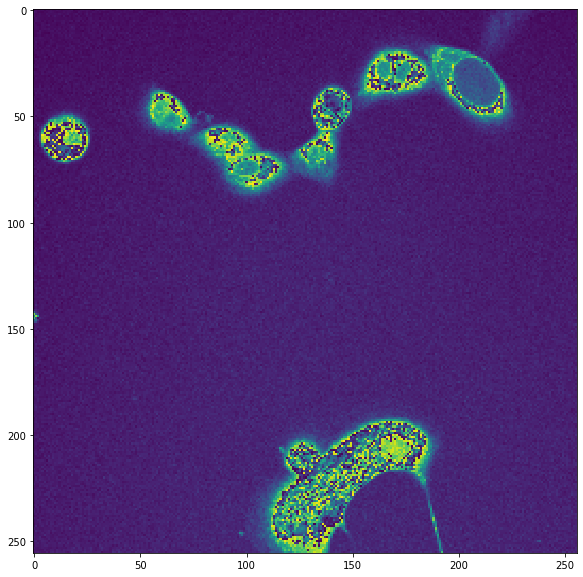

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(cell_img)

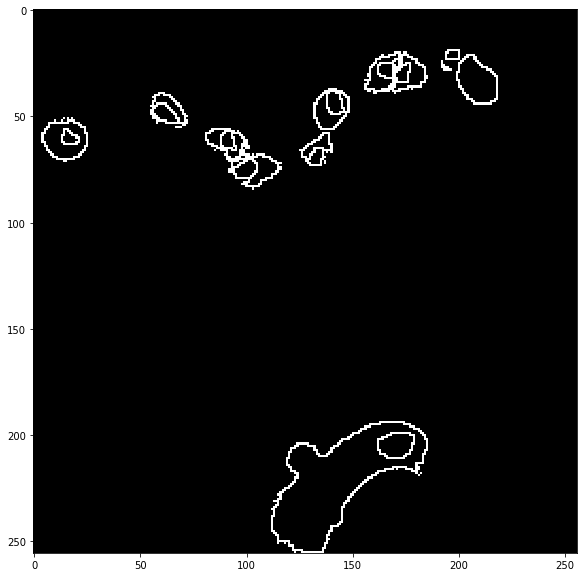

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(cell_mask)

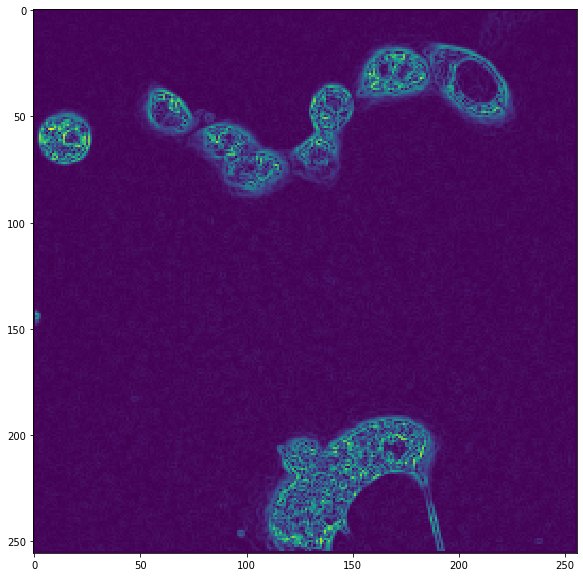

In [28]:
image_soble = skimage.filters.sobel(cell_img)
plt.figure(figsize=(10,10))
plt.imshow(image_soble)

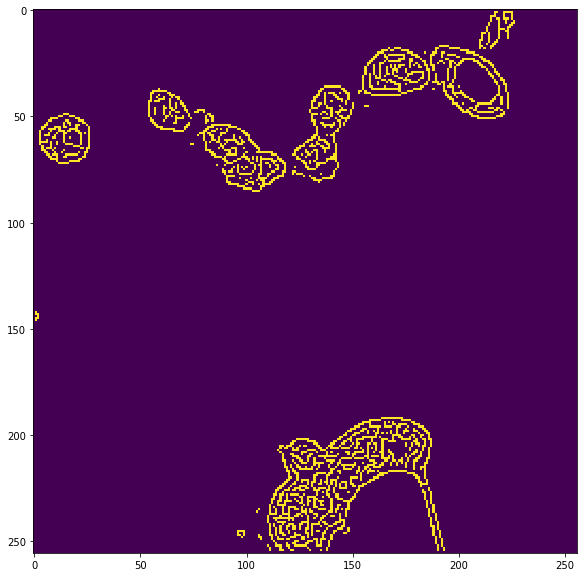

In [33]:
image_canny = feature.canny(cell_img, 1,0)
plt.figure(figsize=(10,10))
plt.imshow(image_canny)